# Logistic Regression in R with Churn Data

Logistic regressions is used when predicting a binary outcome such as yes/no or churned/not churned.

[Summary of Model](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/summary.glm)

[Caret Package Confusion Matrix](https://www.rdocumentation.org/packages/caret/versions/6.0-90/topics/confusionMatrix)

[Durbin-Watson Test](https://www.rdocumentation.org/packages/lmtest/versions/0.9-38/topics/dwtest)

[Outlier Detection](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/influence.measures)

In [1]:
install.packages("vembedr")
library("vembedr")
embed_vimeo("652701254")


The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//Rtmp1aaH5Y/downloaded_packages


Shiny tags cannot be represented in plain text (need html)

https://vimeo.com/652701254

In [1]:
# Install packages
install.packages("tidyverse")
install.packages("caret")
install.packages("IDPmisc")
install.packages("lmtest")
install.packages("ggplot2")


The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpkcYjsO/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpkcYjsO/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpkcYjsO/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpkcYjsO/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpkcYjsO/downloaded_packages


In [2]:
# Load libraries
library(tidyverse)
library(caret)
library(IDPmisc)
library(lmtest)
library(yardstick)
library(ggplot2)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.


Attaching package: ‘yardstick’


The following objects are masked from ‘package:ca

In [3]:
# Read in data
df = read.csv("../../Data/telcomChurn.csv")

In [4]:
# View data set
head(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


## Recode variables

In [5]:
# Recode target variable into Churned (1=churned, 0=No churn)
df$Churned <- NA
df$Churned[df$Churn == "Yes"] <-1
df$Churned[df$Churn == "No"] <-0

In [6]:
# Recode gender into Male (1=male, 0=Female)
df$Male <- NA
df$Male[df$gender == "Male"] <-1
df$Male[df$gender == "Female"] <-0

In [7]:
# View data
head(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churned,Male
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,No,No,One year,No,Mailed check,56.95,1889.50,No,0,1
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,1
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,1
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,0


In [8]:
# Drop missing data
df2 <- NaRV.omit(df)

In [9]:
# Set up Logistic Regression Model
mylogit <- glm(Churned~Male + TotalCharges + MonthlyCharges, data=df2, family="binomial")

In [10]:
# Predict with model
probabilities <- predict(mylogit, type="response")

In [11]:
# View probabilities
probabilities

1          2          3          4          5          6          7 
0.18747442 0.19913509 0.39393458 0.11668588 0.57587314 0.76884919 0.50635263 
         8          9         10         11         12         13         14 
0.16257500 0.51476165 0.08196414 0.28833719 0.10484736 0.14523754 0.22752189 
        15         16         17         18         19         20         21 
0.57733294 0.07201427 0.07610433 0.07331922 0.34794968 0.53077836 0.26294302 
        22         23         24         25         26         27         28 
0.11618602 0.13003371 0.09487413 0.12565532 0.22390223 0.22415588 0.18964620 
        29         30         31         32         33         34         35 
0.06569552 0.36645132 0.06766281 0.80338662 0.27590436 0.13028625 0.31412575 
        36         37         38         39         40         41         42 
0.05939947 0.53918388 0.16682501 0.45430380 0.71996803 0.29891103 0.06416198 
        43         44         45         46         47         48         49 
0.10734202 0.10050794 0.51042095 0.19923111 0.34706416 0.68146883 0.14189097 
        50         51         52         53         54         55         56 
0.07403627 0.25180070 0.69049159 0.32342867 0.61257954 0.10272228 0.60690078 
        57         58         59         60         61         62         63 
0.10045470 0.09376173 0.09774975 0.05783408 0.23827090 0.10883579 0.06143756 
        64         65         66         67         68         69         70 
0.28307196 0.71943283 0.61224679 0.18431894 0.31874144 0.07855027 0.56550297 
        71         72         73         74         75         76         77 
0.35174548 0.07245004 0.10526265 0.07021702 0.50237779 0.16863927 0.12529715 
        78         79         80         81         82         83         84 
0.34877135 0.32657516 0.08480844 0.67738636 0.29707724 0.57290581 0.31469103 
        85         86         87         88         89         90         91 
0.07667190 0.75470068 0.20479762 0.07463756 0.07806690 0.13045618 0.33688654 
        92         93         94         95         96         97         98 
0.63016410 0.07361398 0.10261754 0.05485765 0.54971365 0.06230930 0.12809892 
        99        100        101        102        103        104        105 
0.07349776 0.52564876 0.13028625 0.12669866 0.32486789 0.06854881 0.07381914 
       106        107        108        109        110        111        112 
0.14648528 0.06902609 0.11837600 0.27767269 0.05925602 0.15950162 0.11328501 
       113        114        115        116        117        118        119 
0.25030027 0.24768805 0.07981947 0.75227565 0.11007096 0.74612371 0.08467895 
       120        121        122        123        124        125        126 
0.43144137 0.15531412 0.12657317 0.60435233 0.32704718 0.13078848 0.34346760 
       127        128        129        130        131        132        133 
0.35709481 0.05732088 0.12802831 0.06239479 0.58368405 0.25416271 0.07389103 
       134        135        136        137        138        139        140 
0.22827134 0.30072224 0.08547122 0.37630238 0.06450404 0.06681707 0.58534147 
       141        142        143        144        145        146        147 
0.05799809 0.51787631 0.12800386 0.09482845 0.05722138 0.09241197 0.12444386 
       148        149        150        151        152        153        154 
0.31798311 0.25441063 0.42107228 0.48837830 0.74877270 0.05685545 0.10630784 
       155        156        157        158        159        160        161 
0.12160722 0.53702048 0.47046555 0.10454062 0.37132626 0.14274180 0.32346706 
       162        163        164        165        166        167        168 
0.48612762 0.56728759 0.12967553 0.11805135 0.06052230 0.55968650 0.06673485 
       169        170        171        172        173        174        175 
0.08397884 0.11163509 0.23564611 0.85492531 0.54401824 0.16813419 0.09335892 
       176        177        178        179        180        181        182 
0.10309868 0.46530787 0.5862233

In [12]:
# Recode probas into 1 (yes) and 0 (no)
df2$Predicted <- ifelse(probabilities > .5, 1, 0)

In [13]:
# View predicted classes
df2$Predicted

[1] 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
  [38] 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
  [75] 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 [149] 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1
 [186] 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 [223] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 [260] 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0
 [297] 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 [334] 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 [371] 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 [445] 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0
 [482] 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 [593] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 [667] 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 [741] 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 [815] 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0
 [889] 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1
 [926] 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 [963] 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
[1000] 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0
[1037] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
[1074] 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
[1111] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0
[1148] 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0
[1185] 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0
[1222] 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1
[1259] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0
[1296] 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
[1333] 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0
[1370] 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1
[1407] 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1
[1444] 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0
[1481] 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
[1518] 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1
[1555] 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
[1592] 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0
[1629] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
[1666] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0
[1703] 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0
[1740] 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
[1777] 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
[1814] 0 0 0 0 0 0 0 0 0 0 0 1 0 0

In [14]:
# Convert predictions and actual values to factor
df2$Predicted <- as.factor(df2$Predicted)
df2$Churned <- as.factor(df2$Churned)

In [15]:
# Run confusion matrix on results
conf_matrix <- caret::confusionMatrix(df2$Predicted, df2$Churned, positive='1')
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4690 1036
         1  473  833
                                         
               Accuracy : 0.7854         
                 95% CI : (0.7756, 0.795)
    No Information Rate : 0.7342         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.3917         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.4457         
            Specificity : 0.9084         
         Pos Pred Value : 0.6378         
         Neg Pred Value : 0.8191         
             Prevalence : 0.2658         
         Detection Rate : 0.1185         
   Detection Prevalence : 0.1857         
      Balanced Accuracy : 0.6770         
                                         
       'Positive' Class : 1              
                                         

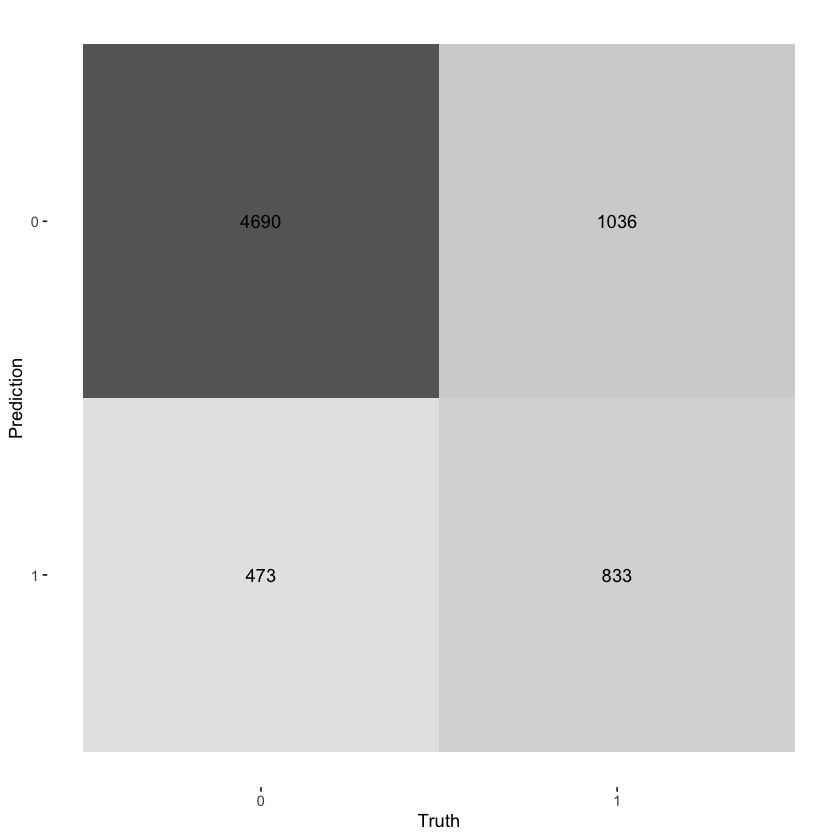

In [16]:
# Plot confusion matrix
cm = conf_mat(df2, Churned, Predicted)
autoplot(cm, type = "heatmap")

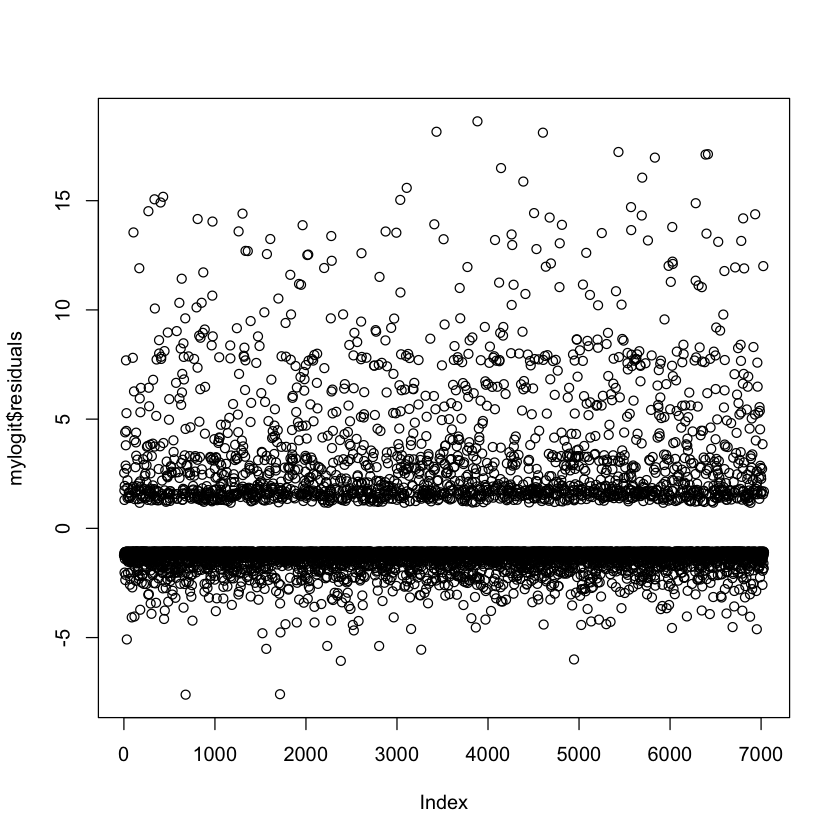

In [17]:
plot(mylogit$residuals)

In [18]:
# Run Durbin-Watson Test to test that the null hypothesis that the autocorrelation of the disturbances is 0
dwtest(mylogit, alternative = "two.sided")


	Durbin-Watson test

data:  mylogit
DW = 1.9999, p-value = 0.9973
alternative hypothesis: true autocorrelation is not 0


In [19]:
## Examine Output
summary(mylogit)


Call:
glm(formula = Churned ~ Male + TotalCharges + MonthlyCharges, 
    family = "binomial", data = df2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0149  -0.6777  -0.4478   0.7453   2.4186  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -2.7981716  0.0944679 -29.620   <2e-16 ***
Male           -0.0014199  0.0614250  -0.023    0.982    
TotalCharges   -0.0006181  0.0000197 -31.372   <2e-16 ***
MonthlyCharges  0.0452301  0.0014307  31.613   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 8143.4  on 7031  degrees of freedom
Residual deviance: 6566.8  on 7028  degrees of freedom
AIC: 6574.8

Number of Fisher Scoring iterations: 4


In [20]:
### Screen for Outliers
infl <- influence.measures(mylogit)
summary(infl)

Potentially influential observations of
	 glm(formula = Churned ~ Male + TotalCharges + MonthlyCharges,      family = "binomial", data = df2) :

     dfb.1_ dfb.Male dfb.TtlC dfb.MntC dffit cov.r   cook.d hat  
105  -0.01   0.02     0.05     0.00     0.06  1.00_*  0.00   0.00
169   0.02   0.02     0.02    -0.03     0.04  1.00_*  0.00   0.00
269   0.03   0.02     0.02    -0.04     0.05  1.00_*  0.00   0.00
336   0.00   0.02     0.04    -0.02     0.05  1.00_*  0.00   0.00
403  -0.01   0.02     0.05    -0.01     0.06  1.00_*  0.00   0.00
431   0.05  -0.02     0.02    -0.04     0.05  1.00_*  0.00   0.00
482   0.03  -0.02     0.02    -0.03     0.04  1.00_*  0.00   0.00
636   0.00  -0.02     0.05    -0.01     0.06  1.00_*  0.00   0.00
675   0.02   0.02     0.02    -0.02     0.04  1.00_*  0.00   0.00
812  -0.01   0.02     0.05    -0.01     0.06  1.00_*  0.00   0.00
874   0.03  -0.02     0.03    -0.03     0.04  1.00_*  0.00   0.00
974   0.03   0.02     0.01    -0.03     0.04  1.00_*  0.00   0.